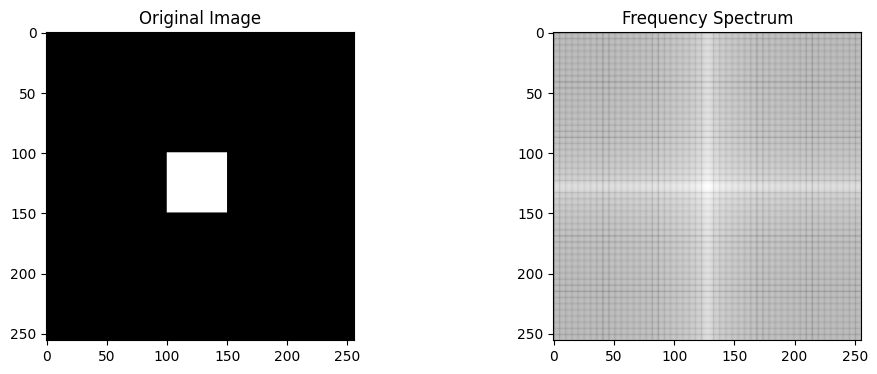

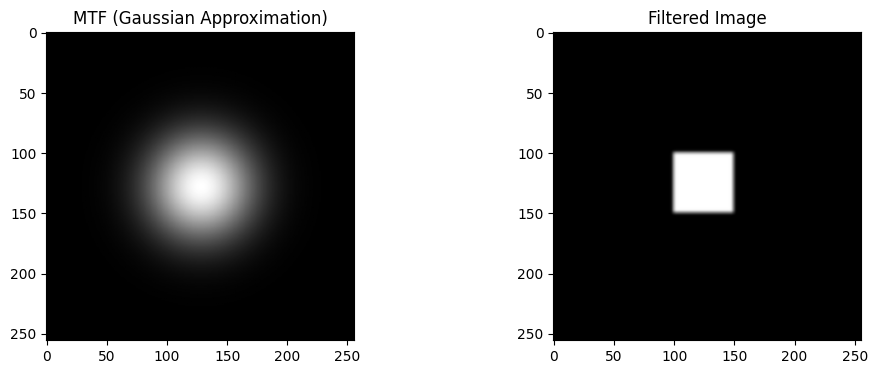

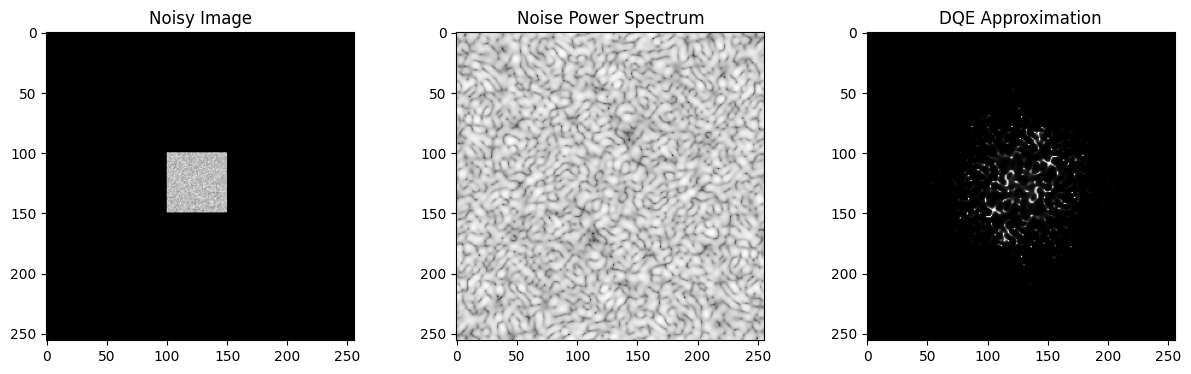

In [1]:
# %% [markdown]
# # Frequency Domain Analysis, MTF, and DQE in Electron Microscopy
# 
# This tutorial introduces frequency domain concepts and their application to microscope performance metrics (MTF/DQE).

# %%
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft2, fftshift, ifft2, ifftshift
from scipy.ndimage import gaussian_filter

# %% [markdown]
# ## 1. Image Representation in Frequency Domain
# 
# All images can be decomposed into spatial frequency components using Fourier Transform

# %%
# Create test pattern
image = np.zeros((256, 256))
image[100:150, 100:150] = 1  # Square object

# Compute FFT and shift DC component to center
fft_image = fft2(image)
fft_shifted = fftshift(fft_image)
magnitude_spectrum = np.log(np.abs(fft_shifted) + 1e-10)

# Plot results
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
ax1.imshow(image, cmap='gray')
ax1.set_title('Original Image')
ax2.imshow(magnitude_spectrum, cmap='gray')
ax2.set_title('Frequency Spectrum')
plt.show()

# %% [markdown]
# ## 2. Modulation Transfer Function (MTF)
# 
# MTF describes how well spatial frequencies are transferred through the system

# %%
# Create Gaussian MTF (simulated)
sigma = 30
x = np.linspace(-128, 127, 256)
y = np.linspace(-128, 127, 256)
X, Y = np.meshgrid(x, y)
mtf = np.exp(-(X**2 + Y**2)/(2*sigma**2))

# Apply MTF in frequency domain
filtered_fft = fft_shifted * mtf
filtered_image = np.abs(ifft2(ifftshift(filtered_fft)))

# Plot MTF and filtered image
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
ax1.imshow(mtf, cmap='gray')
ax1.set_title('MTF (Gaussian Approximation)')
ax2.imshow(filtered_image, cmap='gray')
ax2.set_title('Filtered Image')
plt.show()

# %% [markdown]
# ## 3. Detective Quantum Efficiency (DQE)
# 
# DQE combines signal transfer (MTF) and noise characteristics

# %%
# Add Poisson noise
noisy_image = np.random.poisson(image * 100) / 100.0

# Calculate noise power spectrum
noise = noisy_image - image
fft_noise = fftshift(fft2(noise))
noise_power = np.abs(fft_noise)**2

# Calculate DQE approximation
mtf_squared = mtf**2
dqe = mtf_squared / (noise_power + 1e-12)  # Simplified DQE formula

# Plot components
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 4))
ax1.imshow(noisy_image, cmap='gray')
ax1.set_title('Noisy Image')
ax2.imshow(np.log(noise_power + 1e-10), cmap='gray')
ax2.set_title('Noise Power Spectrum')
ax3.imshow(dqe, cmap='gray', vmax=1)
ax3.set_title('DQE Approximation')
plt.show()

# %% [markdown]
# ## Key Observations:
# 1. **Frequency Spectrum** shows distribution of spatial frequencies
# 2. **MTF** acts as frequency-dependent contrast attenuation
# 3. **DQE** reveals frequency-dependent signal-to-noise performance
# 
# In practice, these metrics are measured using standardized calibration samples and analysis procedures.
